Importing data CSV files using pandas to start the data cleaning
The aim for this project is to distinguish different affects of cvoid in each content and to use data visualisation to show this.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# load the covid data CSV using pandas and uses head (prints first 10 rows) and then the different 
# unique continet values to start thinking about how to group the data and what to plot.
covid_data = pd.read_csv("covid_data.csv")
#print(covid_data.head())
#print(covid_data['continent'].unique())
#print(covid_data.isnull().sum())
#print(covid_data['location'].isnull().sum())

# I tested these due to misssing data in the continent column and wiht there being too many location unique values to plot
# Upon testing I found that some of these values with missing continent data were actually locations that were not countries but rather regions or other entities, 
# which is why they had missing continent data. This is important to note when analyzing the data and deciding how to handle missing values.
print(covid_data['location'].nunique())
print(covid_data[covid_data['continent'].isnull()]['location'].unique())


238
['Africa' 'Asia' 'Europe' 'European Union' 'High income' 'International'
 'Low income' 'Lower middle income' 'North America' 'Oceania'
 'South America' 'Upper middle income' 'World']


 I tested these due to misssing data in the continent column and wiht there being too many location unique values to plot Upon testing I found that some of these values with missing continent data were actually locations that were not countries but rather regions or other entities, 
which is why they had missing continent data. This is important to note when analyzing the data and deciding how to handle missing values.

Grouping by continents and showing their total cases and deaths.

In [28]:
# Group by continent and sum the cases, removing null continents, then print the head of the new dataframe.

covid_by_continent = covid_data[covid_data['continent'].notnull()]
continent_cases = covid_by_continent.groupby('continent')[['total_cases', 'total_deaths']].sum().reset_index()
print(continent_cases.head())

       continent   total_cases  total_deaths
0         Africa  3.204841e+09    79384040.0
1           Asia  2.831127e+10   411399666.0
2         Europe  2.853068e+10   562760242.0
3  North America  2.311379e+10   484924819.0
4        Oceania  2.265656e+08     1288957.0


Starting the data visualisation to plot to compare each continent to where they have suffered more wiht Covid.

Plotting a bar chart using matplotlib to visualize the total cases and total deaths by continent. 
 The y-axis is set to a logarithmic scale to better visualize the differences between continents, 
 especially since some continents may have significantly higher case and death counts than others. 
The bars for total cases are colored blue, while the bars for total deaths are colored red with some transparency (alpha=0.7) 
to allow both sets of bars to be visible when they overlap. The x-axis labels are rotated for better readability, 
 and a legend is included to differentiate between total cases and total deaths. 
 Finally, the layout is adjusted to ensure that all elements fit well within the figure before displaying it.

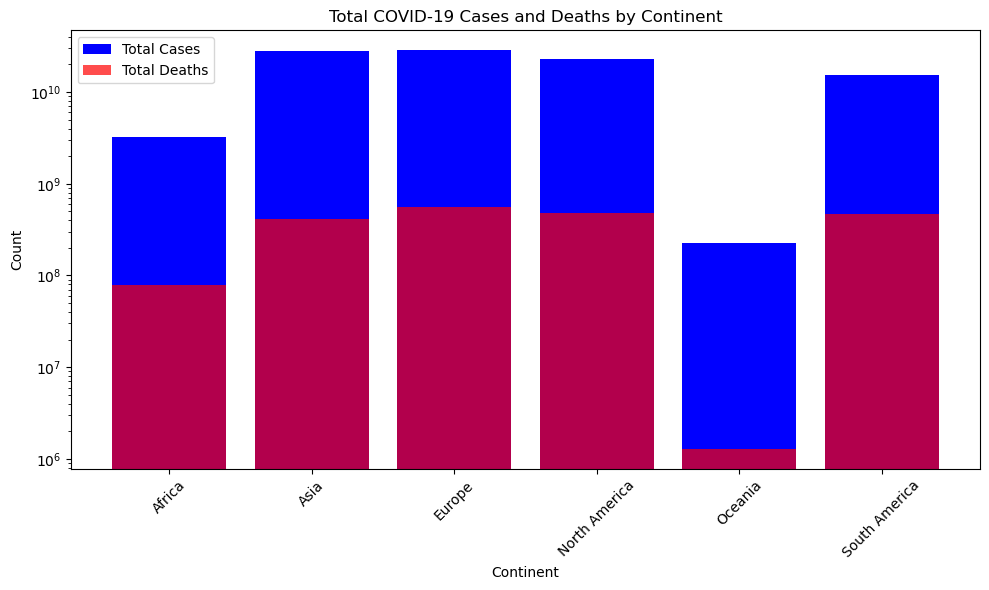

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(continent_cases['continent'], continent_cases['total_cases'], color='blue', label='Total Cases')
plt.bar(continent_cases['continent'], continent_cases['total_deaths'], color='red', label='Total Deaths', alpha=0.7)
plt.xlabel('Continent')
plt.ylabel('Count')
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.title('Total COVID-19 Cases and Deaths by Continent')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

As you can see Africa and Oceania recorded a dramitacally lower number of cases and deaths to other continents.

I had tested the null values to see if this could be the the cause but although there was a lot of null values in continetns this was due to the facts that in location data was inputted as more regions or classes and lifestyle rather than countries tehrefore no continent required.

This low number could be due to for example Africa, having less reporting processing or infrastructure could be a factor. Oceania with a lot less population and very remote from the rest of the world could be a factor in their case.

I removed all the null values and used scale to make the lower values more visiable to the rest of them.